In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
#from sklearn.metrics import r2_score
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation # animation
import imageio 
import sys
import fiona
import rasterio
import rasterio.transform
import rasterio.mask
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape
import os
import functions
import fiona
from shapely.geometry import shape
import importlib
from functions import read_shapefile
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata

In [27]:
5/28

0.17857142857142858

In [45]:
path_output = '/Users/francesco/Desktop/prove/target.npy'
#load the predictions
target = np.load(path_output, allow_pickle=True)


In [47]:
prova = target.copy()

In [57]:
#I want to create an index which has the same lenght of the target array, but is 1 for the first 11 elements, 2 for the following 11 elements, and so on
index = np.zeros(len(target))
for i in range(len(target)):
    index[i] = int(i/11)+1

#I want to create an index which has the same lenght of the target array, which goes from 2005 to 2015, adn then repeat till the end
years = np.zeros(len(target))
for i in range(len(target)):
    years[i] = 2005 + i%11
    

In [63]:
#concatenate now the 2 indices, index and years
index_tot = np.concatenate((index.reshape(-1,1).astype(int), years.reshape(-1,1).astype(int)), axis=1)

In [92]:
np.shape(prova)

(308, 1024, 1024, 1)

In [96]:
X_train.shape

(308, 1024, 1024, 1)

In [109]:
y_train = []
y_test = []

for sample in range(len(prova)):    
    region, year = index_tot[sample]

    if region in [1,8,9,12,17,21]:
        y_test.append(target[sample])
    else:
        y_train.append(target[sample])
        
y_train = np.array(y_train)
y_test = np.array(y_test)
  


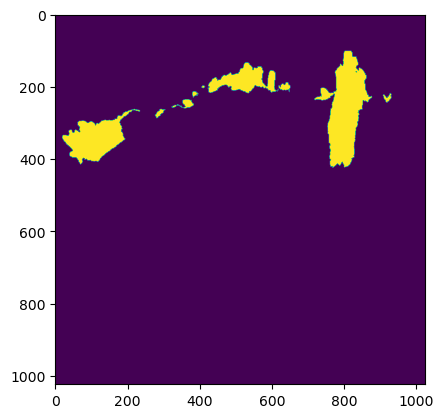

In [113]:
plt.imshow(y_test[12,:,:,0])

In [46]:
sea_mask = '/Users/francesco/Desktop/sea_mask.npy'
common_years = np.arange(2005,2017,1)
ids = np.arange(1, 29, 1)
#open the ice mask
sea_mask = np.load(sea_mask, allow_pickle=True)
sea_mask = pd.DataFrame(sea_mask, index=ids, columns=common_years)

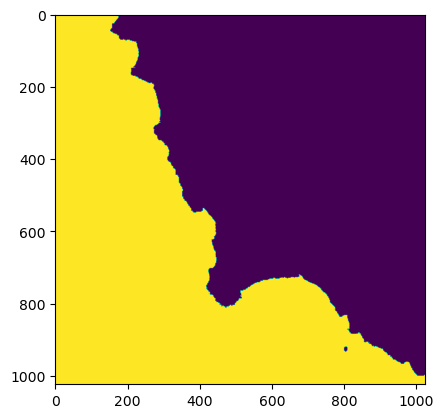

In [47]:
plt.imshow(sea_mask.loc[1,2005])

In [44]:
common_years = np.arange(2005, 2017)
dfs = []

for region in range(1, 29):  # Modify range(1, 29) if you have regions 1 to 28
    file_path = f'/Users/francesco/Desktop/prove/v_x_region_{region}.npy'
    data = np.load(file_path, allow_pickle=True)
    index = [region]
    df = pd.DataFrame(data, index=index, columns=common_years)
    dfs.append(df)

bm = pd.concat(dfs, axis=0)



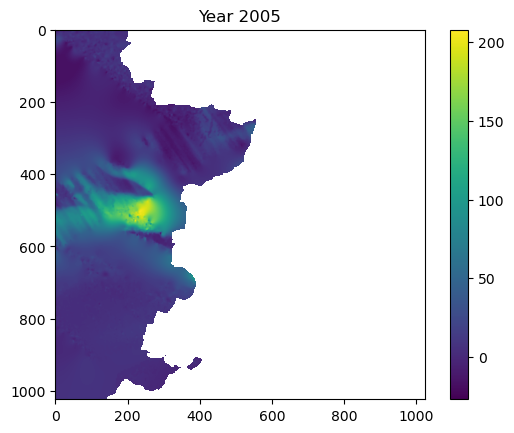

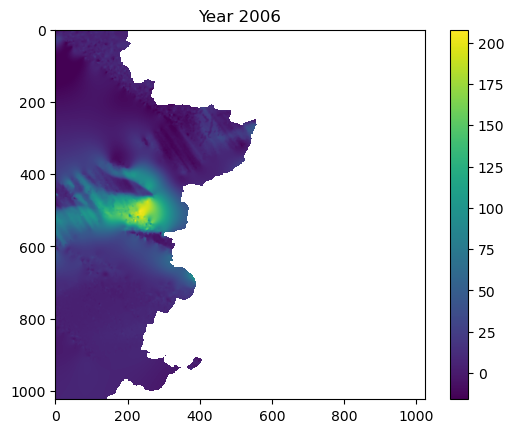

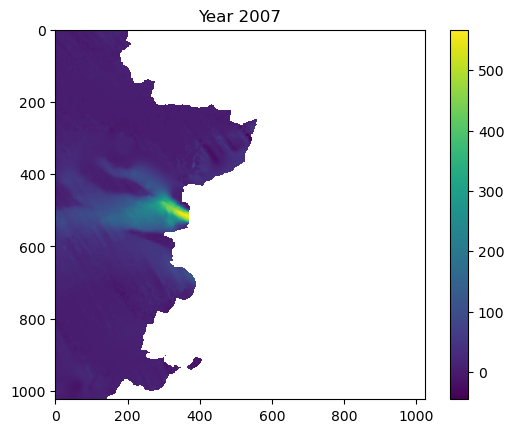

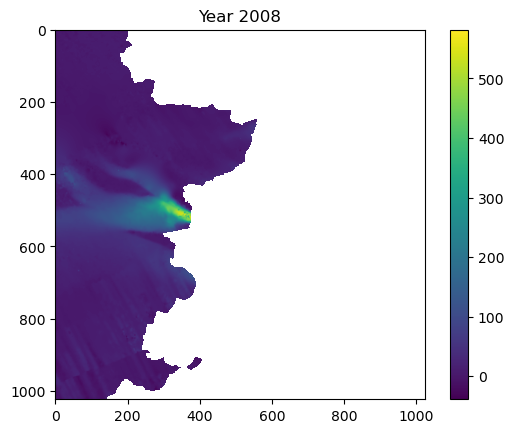

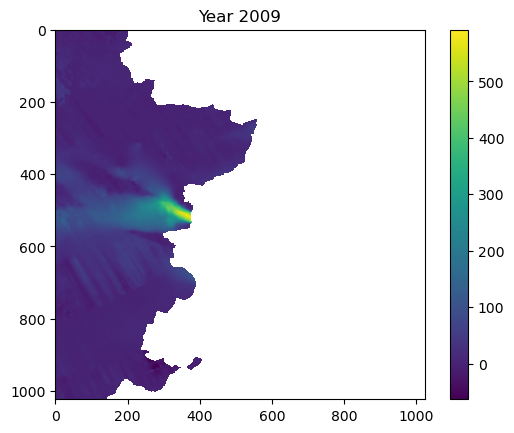

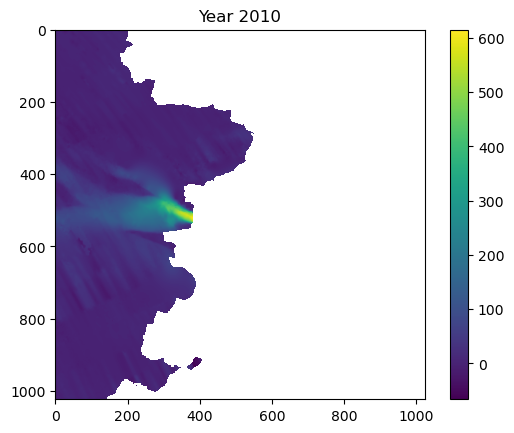

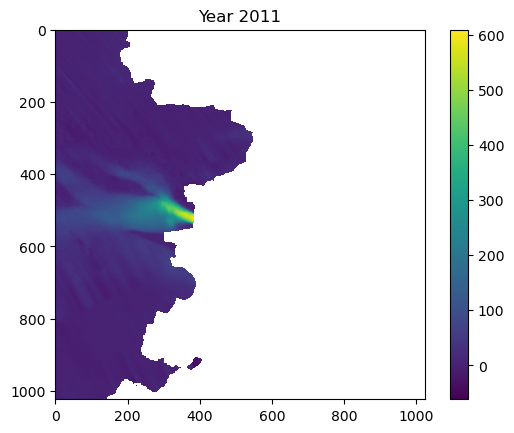

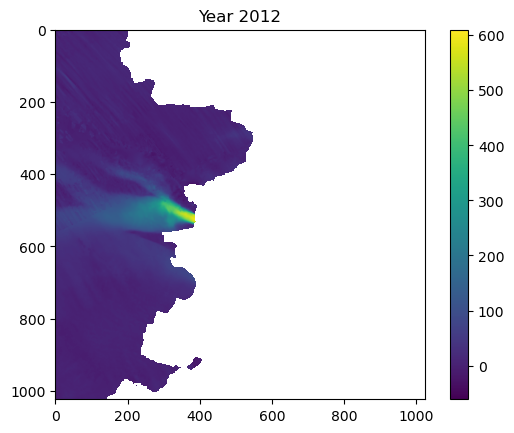

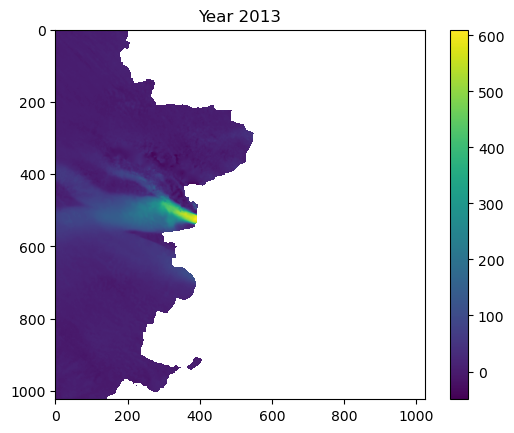

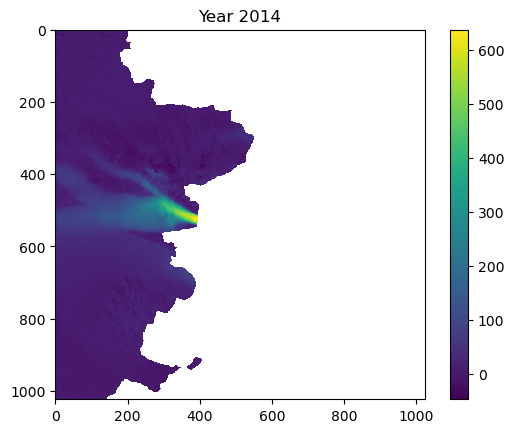

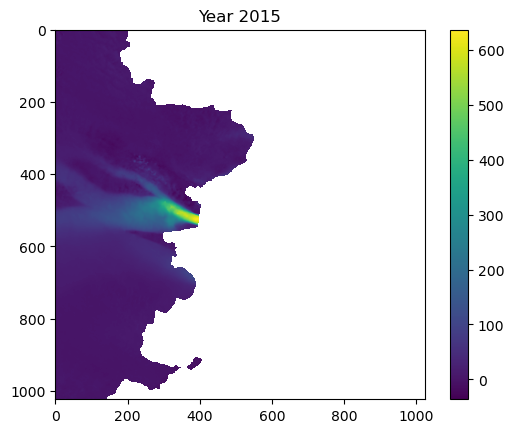

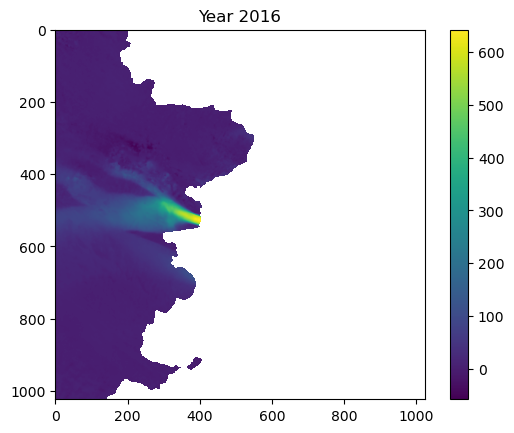

In [49]:
id = 4
for year in common_years:
    prova = bm.loc[id, year]
    prova[sea_mask.loc[id, year]] = np.nan
    plt.imshow(prova)

    plt.title(f'Year {year}')
    plt.colorbar()
    plt.show()

In [12]:
bm.index

Int64Index([10, 11, 12], dtype='int64')

In [30]:
#create a mask of boolean shaped 1024x1024
mask = np.zeros((1024,1024), dtype=bool)
mask[512, 512] = True


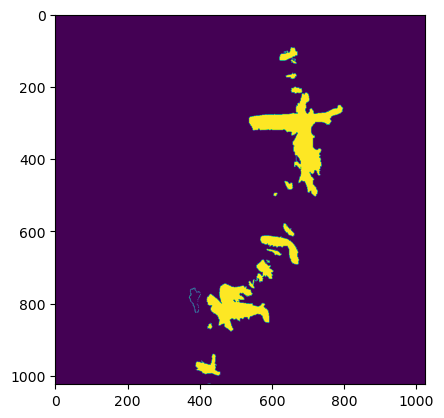

In [49]:
ice_mask = '/Users/francesco/Desktop/ice_mask.npy'
common_years = np.arange(2005,2017,1)
ids = np.arange(1, 29, 1)
#open the ice mask
ice_mask = np.load(ice_mask, allow_pickle=True)
ice_mask = pd.DataFrame(ice_mask, index=ids, columns=common_years)

# region_id = 24
# #ice_mask = ice_mask.loc[region_id]

# print('The shape of the ice mask is:', ice_mask.shape)
# shape_file = '/Users/francesco/Desktop/squares.shp.gpkg'
# df = read_shapefile(shape_file, region_id)

plt.imshow(ice_mask.loc[3, 2012])

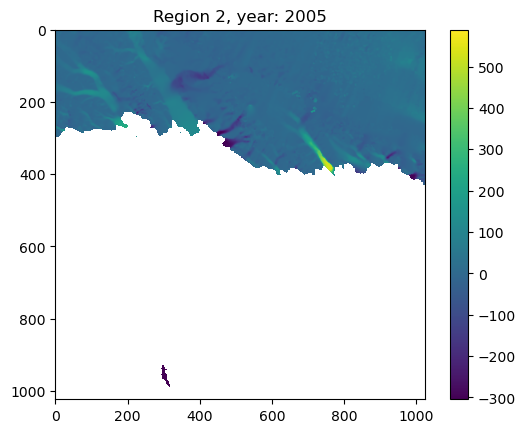

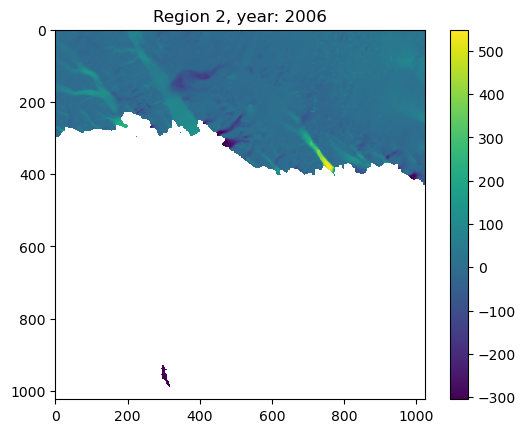

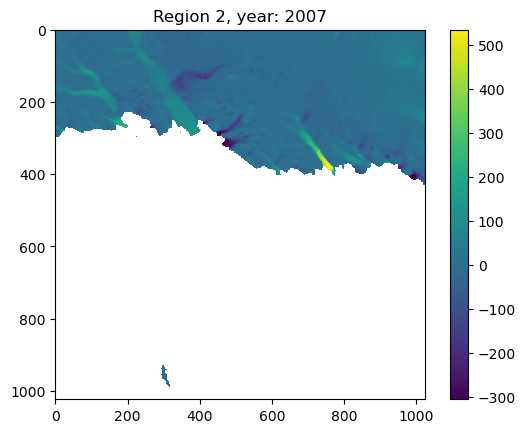

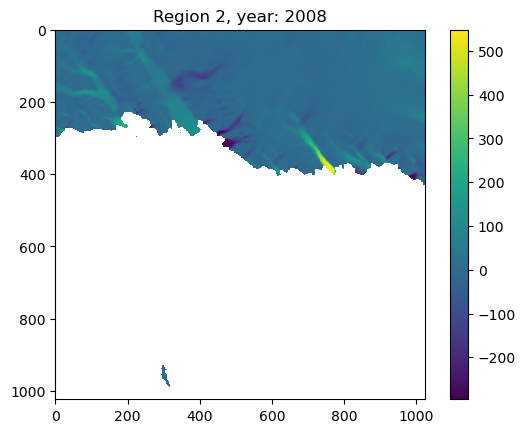

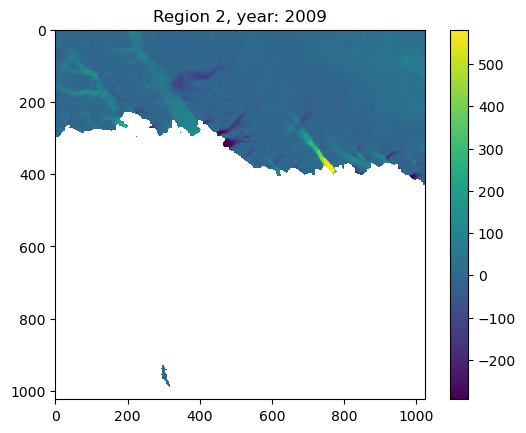

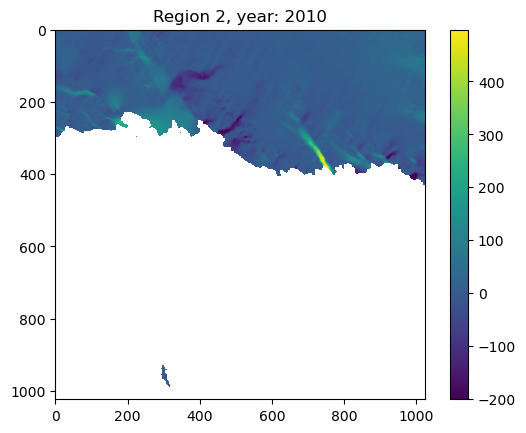

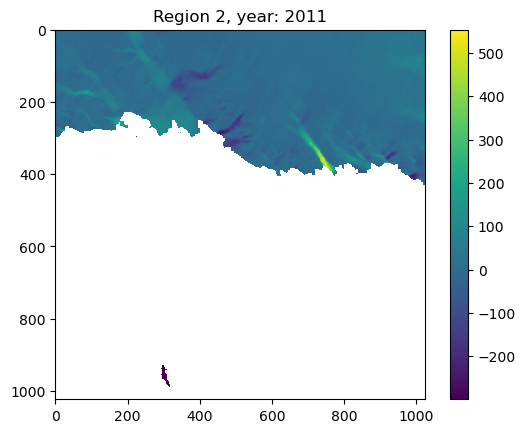

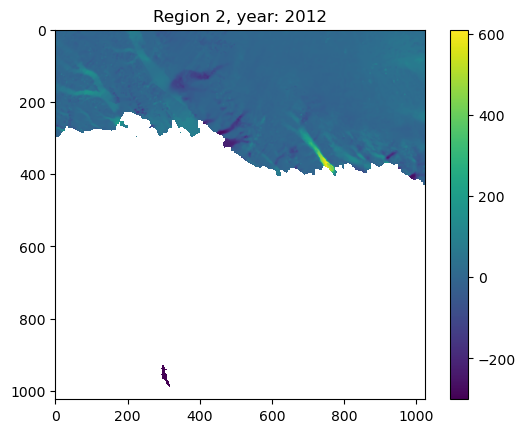

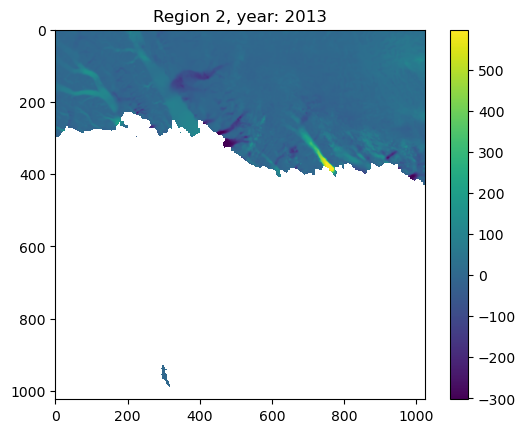

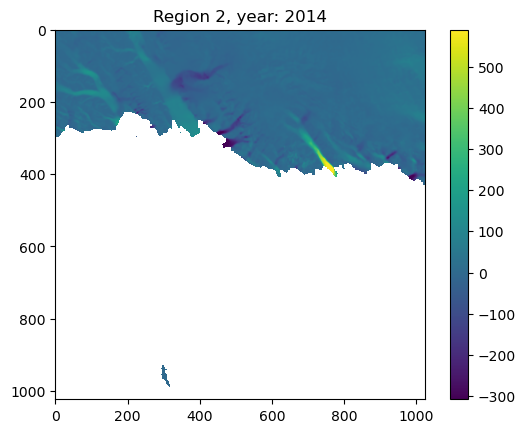

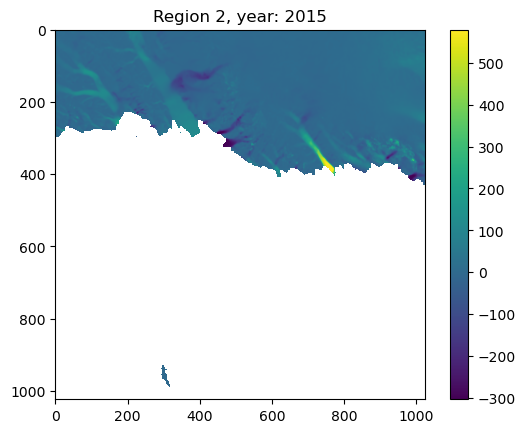

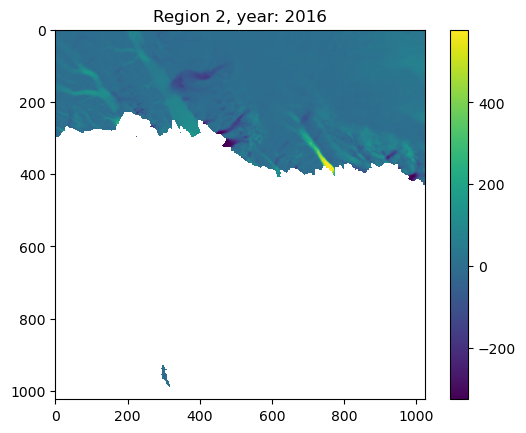

In [20]:
id = [2]

bm = '/Users/francesco/Desktop/v_x_region_2.npy'
bm = np.load(bm, allow_pickle=True)
bm = pd.DataFrame(bm, index=id, columns=common_years)

for year in common_years:
    ugo = bm.loc[2,year]
    ugo[ugo == 0] = np.nan
    plt.imshow(ugo)
    plt.title('Region 2, year: %s' % year)
    # add colorbar
    plt.colorbar()
    plt.show()

In [10]:
for i in ids:
    for year in common_years:
        prova = ice_mask.loc[i, year]
        print('The shape of the ice mask of region ', i, ' in the year ', year, ' is:', prova.shape)

The shape of the ice mask of region  1  in the year  2005  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2006  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2007  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2008  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2009  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2010  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2011  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2012  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2013  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2014  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2015  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2016  is: (1024, 1024)
The shape of the ice mask of region  2  in the year  2005  is: (1024, 1024)
The shape of

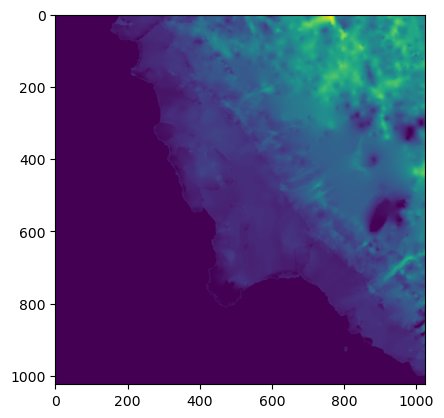

In [27]:
thickness = '/Users/francesco/Desktop/thickness_region_1.npy'
common_years = np.arange(2005,2017,1)

 
id = [1]
thickness = np.load(thickness, allow_pickle=True)
thickness = pd.DataFrame(thickness, index = id, columns = common_years)

plt.imshow(thickness.loc[1, 2007])

In [28]:
masks = '/Users/francesco/Desktop/ice_mask.npy'

id = np.arange(1,29,1)


masks = np.load(masks, allow_pickle=True)
masks = pd.DataFrame(masks, index = id, columns = common_years)

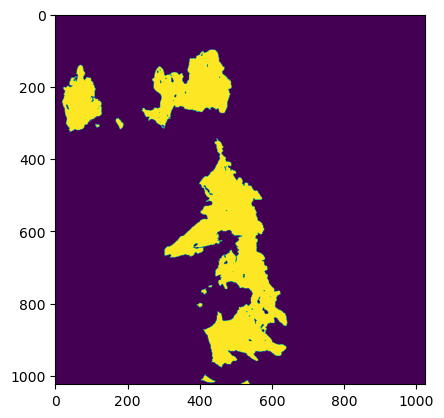

In [54]:
plt.imshow(masks.loc[24, 2007])

In [23]:
path_to_velocity = '/Users/francesco/Desktop/v_region_1.npy'

velocity = np.load(path_to_velocity, allow_pickle=True)
velocity = pd.DataFrame(velocity, index = id, columns = common_years)

In [ ]:
path_to_sic = '/Users/francesco/Desktop/used_2/seaice_conc_monthly_sh_200501.tif'

In [36]:
import os

# Define the root directory
root = '/Users/francesco/Desktop/Thesis/Data/monthly/used_2/'


# Define the list of files
list_of_files = []
common_years = np.arange(2005,2017,1)

# Loop through the years and months to generate filenames
for year in range(2005, 2017):
    for month in range(1, 13):
        # Pad single-digit months with a leading zero
        padded_month = f"{month:02d}"
        # Generate the filename and add it to the list
        filename = f"{root}seaice_conc_monthly_sh_{year}{padded_month}.tif"
        list_of_files.append(filename)

# Print the list of files
print("List of files:")
for file in list_of_files:
    print(file)



List of files:
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200501.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200502.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200503.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200504.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200505.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200506.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200507.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200508.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200509.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200510.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200511.tif
/Users/francesco/Desktop/Thesis/Data/mo

In [45]:
df.index

Int64Index([25], dtype='int64')

In [50]:
sic = pd.DataFrame(index = df.index, columns = common_years)

for id in df.index:

    month = 0

    for year in common_years:

        image_avg = np.zeros((1024,1024))

        for i in range(0,12):

            j = month + i
            file = list_of_files[j]
            #print(file)

            with rasterio.open(file, crs = 'EPSG:3031') as src:

                xmin, ymin, xmax, ymax = df.loc[id, 'boundaries']
                window = rasterio.windows.from_bounds(xmin, ymin, xmax, ymax, src.transform) 
                image = src.read(1, window=window) #this is bm in the window
                image_avg = image_avg + image
                    
                if i == 11:
                    #print('Saved till month ' + str(j))
                    image_avg = image_avg/12
                    sic.loc[id,year] = image_avg
                    month = month + 12

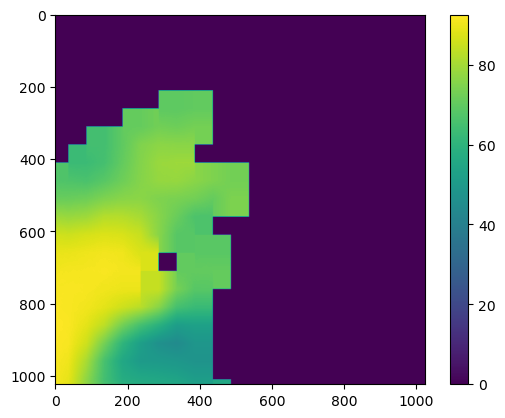

In [58]:
prova = sic.loc[24, 2007]
prova = np.where(prova > 100, 0, prova)

plt.imshow(prova)
plt.colorbar()

In [11]:
path_to_sic = '/Users/francesco/Desktop/sic_region_1.npy'
common_years = np.arange(2005,2017,1)
id = [1]
#load the sic
sic = np.load(path_to_sic, allow_pickle=True)
sic = pd.DataFrame(sic, index = id, columns = common_years)

In [20]:
path_to_bm = '/Users/francesco/Desktop/bm_region_1.npy'

bm = np.load(path_to_bm, allow_pickle=True)
bm = pd.DataFrame(bm, index = id, columns = common_years)